# **Analysis of the data**

## **Preliminary steps**

In [1]:
### PACKAGES

import pandas as pd
import numpy as np

In [ ]:
### FUNCTIONS

from src.libs import preprocessing, visualization

from src.configs import names, constants

In [3]:
pd.set_option("display.max_columns", None)

## **RAW DATA**

In [4]:
### LOAD DATA

df_gpt = preprocessing.load_dataset(source="GPT", type="ESSAY")
df_bard = preprocessing.load_dataset(source="BARD", type="ESSAY")
df_human = preprocessing.load_dataset(source="Human", type="ESSAY")

Time taken to load dataset: 0.01391911506652832 seconds
Time taken to load dataset: 0.010185003280639648 seconds
Time taken to load dataset: 0.08997559547424316 seconds


In [5]:
### GET TRAIN SPLIT

df_train_gpt, _ = preprocessing.train_valid_split(df_gpt)
df_train_bard, _ = preprocessing.train_valid_split(df_bard)
df_train_human, _ = preprocessing.train_valid_split(df_human)

In [6]:
### CHECK SHAPES

print(f"Shape of the GPT train set : {df_train_gpt.shape}")
print(f"Shape of the BARD train set : {df_train_bard.shape}")
print(f"Shape of the HUMAN train set : {df_train_human.shape}")

Shape of the GPT train set : (180, 2)
Shape of the BARD train set : (178, 2)
Shape of the HUMAN train set : (2220, 1)


In [7]:
### CHECK STRUCTURE - GPT

df_train_gpt.sample(n=5)

,prompts,responses
25,Is “an eye for an eye” a good basis for deter...,"On the one hand, the principle of ""an eye fo..."
183,. Describe your school.,A school is a place where students receive fo...
188,Describe the chores and responsibilities that...,"In a household setting, chores and responsibi..."
12,As part of the “war on drugs” and in reaction...,"On one hand, those who support targeted sear..."
167,You want to buy a new state of the art compu...,Purchasing a new state-of-the-art computer i...


In [8]:
### CHECK STRUCTURE - BARD

df_train_bard.sample(n=5)

,prompts,BARD
24,"Today, there are more and more reality shows ...",Whether or not reality shows make good televis...
148,Explain why some people may be afraid of shar...,There are many reasons why some people may be ...
91,"Alexander Smith said, The great man is the ma...",Alexander Smith's definition of greatness is t...
29,The singer and songwriter Bob Dylan once wrot...,Bob Dylan's definition of success is certainly...
94,"Currently, Americans pay taxes based upon how...",The current American tax system is a progressi...


In [9]:
df_train_bard[df_train_bard["BARD"].str.startswith("Sure")]

,prompts,BARD
113,Imagine that you have made it to the final ro...,"Sure, I can help you with that. Here is an exa..."
125,Tell about a world-class athlete. Explain why...,"Sure, here is a long essay about a world-class..."
191,"With the hope of preserving family history, d...","Sure, here are some questions you can ask an o..."
171,Explain what you might do to help a sick frie...,"Sure, here are some things you might do to hel..."
150,Explain to a doctor what would be helpful dur...,"Sure, here are some things you can do to help ..."
138,Describe techniques or methods that could hel...,"Sure, here are some techniques or methods that..."
111,Imagine that your high school (or alma mater)...,"Sure, here is an essay persuading school offic..."
159,Describe how weather affects your commute to...,Sure. The weather can affect my commute to sch...
162,Explain some of the best ways to prepare for...,"Sure, here are some of the best ways to prepar..."
90,Many of us are fond of music that speaks to o...,"Sure, here is an essay that convinces others n..."


In [10]:
### CHECK STRUCTURE - HUMAN

df_train_human.sample(n=5)

,essays
ID,
1986,I don't know what to write about really and I ...
2349,"Yesterday, I went tubing with my family on the..."
261,I'm hungry. I want some ice cream but I don't ...
1679,"well, I'm thinking right now about how thinkin..."
1545,I wonder if he is going to call me tonigh...


In [11]:
### CHECK MISSING VALUES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Missing values in {name} dataset :")
    print(df.isna().sum())
    print("\n")

Missing values in GPT dataset :
prompts      0
responses    0
dtype: int64


Missing values in BARD dataset :
prompts    0
BARD       0
dtype: int64


Missing values in HUMAN dataset :
essays    0
dtype: int64




In [12]:
### CHECK EMPTY TEXT

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Empty text in {name} dataset :")
    if name == "BARD":
        print(len(df[df["BARD"] == ""]))
    elif name == "GPT":
        print(len(df[df["responses"] == ""]))
    elif name == "HUMAN":
        print(len(df[df["essays"] == "\r\r\n"]))
    print("\n")

Empty text in GPT dataset :
0


Empty text in BARD dataset :
0


Empty text in HUMAN dataset :
0




In [13]:
### CHECK DUPLICATES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Duplicate rows in {name} dataset :")
    print(df.duplicated().sum())
    print("\n")

Duplicate rows in GPT dataset :
0


Duplicate rows in BARD dataset :
0


Duplicate rows in HUMAN dataset :
0




## **CLEAN DATA**

In [14]:
### CLEAN AND CONCATENATE DATASETS

df_train = preprocessing.get_essay_dataset(df_train_gpt, df_train_bard, df_train_human)

In [15]:
### CHECK

df_train.sample(10)

,text,abstract,label,type
151,"History is often seen as a dry, boring subject...",Many students complain about having to learn ...,1,essay
128,Thomas Edison's statement suggests that genius...,"Thomas Edison, the renowned inventor, is famo...",1,essay
2419,Right now I'm writing about the things I am th...,No abstract,0,essay
2444,Will I survive? That is what I am thinking abo...,No abstract,0,essay
2290,I'm very tired and don't want to take a shower...,No abstract,0,essay
2450,I could talk about all the controversial issue...,No abstract,0,essay
1518,I didn't know there was a timer on this thing....,No abstract,0,essay
510,I don't want to go home. I have to take the st...,No abstract,0,essay
1801,I am very disappointed. its been raining all d...,No abstract,0,essay
741,"Hi, when I think of this type of writing I thi...",No abstract,0,essay


In [16]:
### CHECK EMPTY TEXTS

df_train[df_train["text"] == ""]

,text,abstract,label,type


In [17]:
### CHECK SPLIT

df_train[names.LABEL].value_counts()

label
0    2220
1     180
2     178
Name: count, dtype: int64

## **PLOTS**

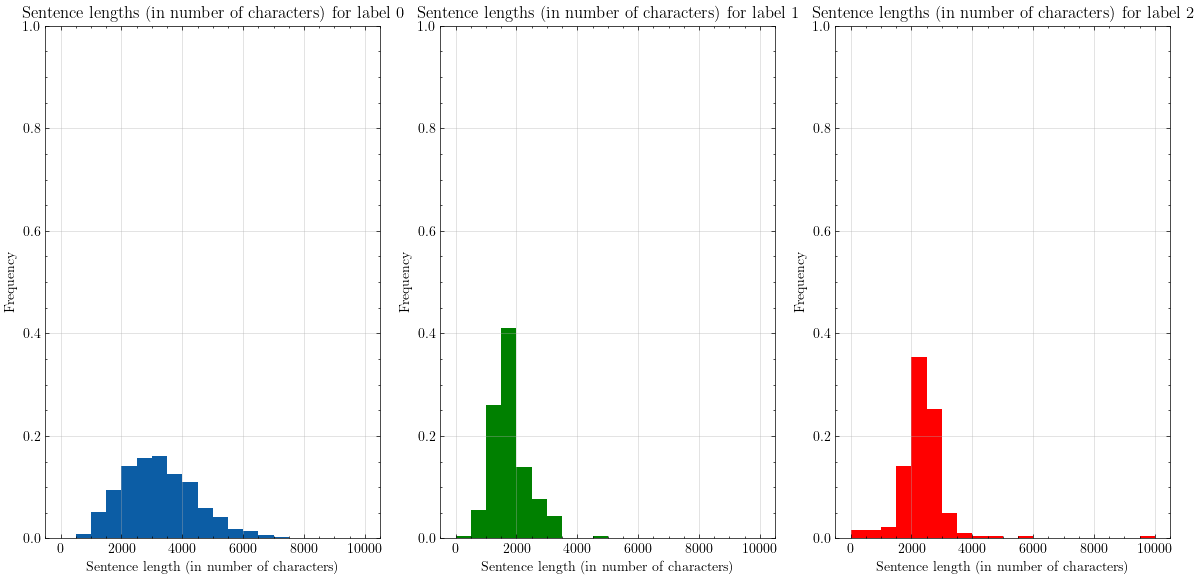

In [18]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (CHARACTERS)

sentence_lengths_chars = np.array(df_train[names.TEXT].str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_chars,
    labels=df_train[names.LABEL],
    type="characters",
)

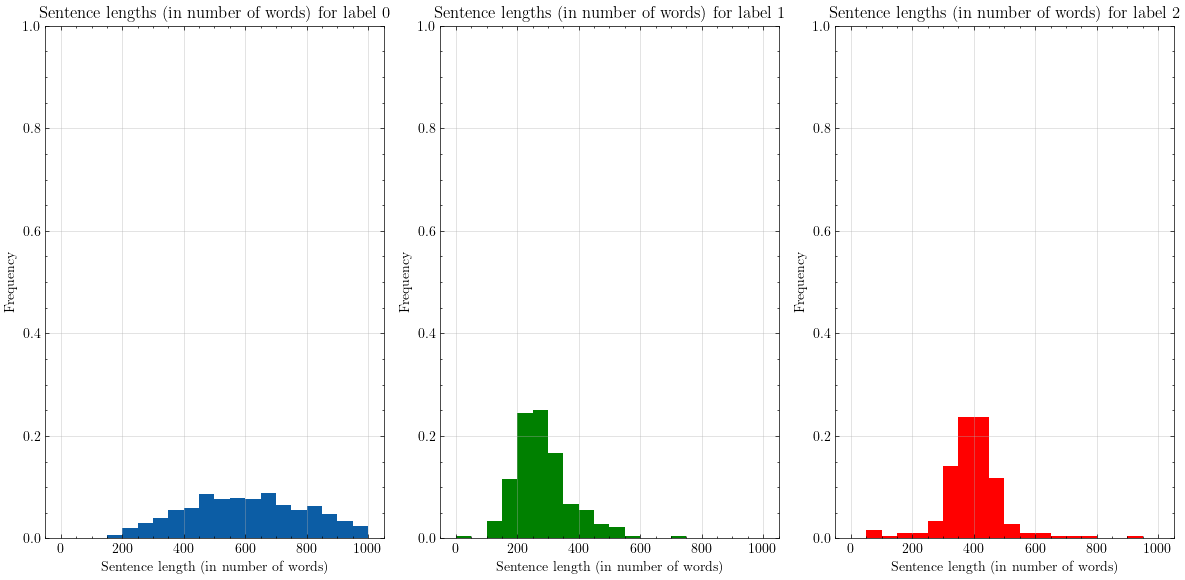

In [19]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (WORDS)

sentence_lengths_words = np.array(df_train[names.TEXT].str.split().str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_words, labels=df_train[names.LABEL], type="words"
)

In [20]:
### PLOT WORDCLOUD FOR EACH TEXT

texts = df_train[names.TEXT].to_numpy()
labels = df_train[names.LABEL].to_numpy()

visualization.plot_wordcloud_slider(texts=texts, labels=labels)

interactive(children=(IntSlider(value=0, description='ID', max=2577), Output()), _dom_classes=('widget-interac…